## Style Transfer Setup
We'll be using a model from TensorFlow Hub simply because it was the quickest way I found to do this. PyTorch implementation was painfully long. Using TF should not matter here since we're only preparing a dataset using it.

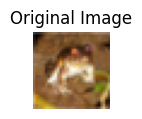

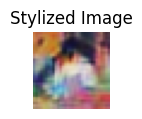

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Step 1: Load the CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Display the original content image
plt.figure(figsize=(1, 1))
plt.imshow(train_images[0])
plt.axis('off')
plt.title('Original Image')
plt.show()


# Preprocess the content image (first image from the dataset)
content_image = train_images[0]
content_image = content_image.astype(np.float32) / 255.0  # Normalize to [0,1]
content_image = np.expand_dims(content_image, axis=0)     # Add batch dimension

# Step 2: Load a style image from the internet
style_image_path = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')
# Function to load and preprocess the style image
def load_style_image(image_path):
    max_dim = 512
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)  # Normalize to [0,1]

    # Resize the image while maintaining aspect ratio
    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    scale = max_dim / max(shape)
    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]  # Add batch dimension
    return img

style_image = load_style_image(style_image_path)

# Step 3: Load the style transfer model from TensorFlow Hub
style_transfer_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Step 4: Apply the style to the content image
stylized_image = style_transfer_model(tf.constant(content_image), tf.constant(style_image))[0]

# Function to convert tensor to image
def tensor_to_image(tensor):
    tensor = tensor * 255
    tensor = tf.clip_by_value(tensor, 0, 255)
    tensor = tf.cast(tensor, tf.uint8)
    tensor = tensor[0]  # Remove batch dimension
    return Image.fromarray(tensor.numpy())

# Step 5: Display the stylized image
stylized_image_pil = tensor_to_image(stylized_image)

plt.figure(figsize=(1, 1))
plt.imshow(stylized_image_pil)
plt.axis('off')
plt.title('Stylized Image')
plt.show()


## Extending this to all Images

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


# Step 2: Load a style image from the internet
style_image_path = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')

# Function to load and preprocess the style image
def load_style_image(image_path):
    max_dim = 512
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)  # Normalize to [0,1]

    # Resize the image while maintaining aspect ratio
    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    scale = max_dim / max(shape)
    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]  # Add batch dimension
    return img

style_image = load_style_image(style_image_path)

# Function to convert tensor to image
def tensor_to_image(tensor):
    tensor = tensor * 255
    tensor = tf.clip_by_value(tensor, 0, 255)
    tensor = tf.cast(tensor, tf.uint8)
    tensor = tensor[0]  # Remove batch dimension
    return Image.fromarray(tensor.numpy())



# Step 3: Load the style transfer model from TensorFlow Hub
style_transfer_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')


# Step 1: Load the CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()


print(len(test_images))

styled_images_PIL = []
i = 0
for content_image in test_images:
  content_image = content_image.astype(np.float32) / 255.0  # Normalize to [0,1]
  content_image = np.expand_dims(content_image, axis=0)     # Add batch dimension
  stylized_image = style_transfer_model(tf.constant(content_image), tf.constant(style_image))[0]
  stylized_image_pil = tensor_to_image(stylized_image)
  styled_images_PIL.append(stylized_image_pil)


tensor = VIT_PreProcess(images=styled_images_PIL, return_tensors='pt')

print(tensor["pixel_values"].shape)
torch.save(tensor, './data/styled.pt')



10000
torch.Size([4, 3, 224, 224])


Extending using Simple ToTensor() FOR CNN & CLIP

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


# Step 2: Load a style image from the internet
style_image_path = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')

# Function to load and preprocess the style image
def load_style_image(image_path):
    max_dim = 512
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)  # Normalize to [0,1]

    # Resize the image while maintaining aspect ratio
    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    scale = max_dim / max(shape)
    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]  # Add batch dimension
    return img

style_image = load_style_image(style_image_path)

# Function to convert tensor to image
def tensor_to_image(tensor):
    tensor = tensor * 255
    tensor = tf.clip_by_value(tensor, 0, 255)
    tensor = tf.cast(tensor, tf.uint8)
    tensor = tensor[0]  # Remove batch dimension
    return Image.fromarray(tensor.numpy())



# Step 3: Load the style transfer model from TensorFlow Hub
style_transfer_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')


# Step 1: Load the CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()


print(len(test_images))

styled_images_PIL = []
i = 0
for content_image in test_images:
  content_image = content_image.astype(np.float32) / 255.0  # Normalize to [0,1]
  content_image = np.expand_dims(content_image, axis=0)     # Add batch dimension
  stylized_image = style_transfer_model(tf.constant(content_image), tf.constant(style_image))[0]
  stylized_image_pil = tensor_to_image(stylized_image)
  styled_images_PIL.append(stylized_image_pil)
  i += 1
  print(f"image: {i}")
  if (i == 2500):
    break



#### MAGIC HERE ######
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms

# Define your custom dataset class
class ImageDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images  # List of PIL Images
        self.labels = labels  # List or NumPy array of labels
        self.transform = transform  # Transformations to be applied to the images

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]  # Get the image at the specified index
        label = self.labels[idx]  # Get the corresponding label

        if self.transform:
            image = self.transform(image)  # Apply transformations to the image

        # Convert label to a tensor if it's not already
        if not isinstance(label, torch.Tensor):
            label = torch.tensor(label, dtype=torch.long)

        return image, label

# Define the transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to VGG16 input size (224x224)
    transforms.ToTensor(),
])

# Initialize your dataset
dataset = ImageDataset(styled_images_PIL, test_labels.flatten()[0:2500], transform=transform)

# Create a DataLoader with the dataset
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

# Example of iterating through the DataLoader


10000
image: 1
image: 2
image: 3
image: 4
image: 5
image: 6
image: 7
image: 8
image: 9
image: 10
image: 11
image: 12
image: 13
image: 14
image: 15
image: 16
image: 17
image: 18
image: 19
image: 20
image: 21
image: 22
image: 23
image: 24
image: 25
image: 26
image: 27
image: 28
image: 29
image: 30
image: 31
image: 32
image: 33
image: 34
image: 35
image: 36
image: 37
image: 38
image: 39
image: 40
image: 41
image: 42
image: 43
image: 44
image: 45
image: 46
image: 47
image: 48
image: 49
image: 50
image: 51
image: 52
image: 53
image: 54
image: 55
image: 56
image: 57
image: 58
image: 59
image: 60
image: 61
image: 62
image: 63
image: 64
image: 65
image: 66
image: 67
image: 68
image: 69
image: 70
image: 71
image: 72
image: 73
image: 74
image: 75
image: 76
image: 77
image: 78
image: 79
image: 80
image: 81
image: 82
image: 83
image: 84
image: 85
image: 86
image: 87
image: 88
image: 89
image: 90
image: 91
image: 92
image: 93
image: 94
image: 95
image: 96
image: 97
image: 98
image: 99
image: 100
im

In [ ]:
next(iter(dataloader))[1].shape

torch.Size([256])

## Creating a New DataSet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Setup && Installations

In [ ]:
import torch
from transformers import ViTForImageClassification
from transformers import AutoImageProcessor
from torch.utils.data import Dataset
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
from torchvision import transforms
import matplotlib.pyplot as plt
from google.colab import drive
from PIL import Image
import numpy as np
import tensorflow_hub as hub
import os
import tensorflow as tf
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

import random

# drive.mount('/content/drive')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

BATCH_SIZE = 256

## Import && load the relevant models

In [ ]:
# VIT Model
# VIT_model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")
# CIFAR10_state_dict = torch.load("/content/drive/MyDrive/AdvMLPA1-01-VIT.pth", map_location=device)
# VIT_model.load_state_dict(CIFAR10_state_dict, strict=False)

# VIT Preprocessor\
VIT_PreProcess = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


In [ ]:
# CNN Model
from torchvision import models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

vgg16 = models.vgg16(pretrained=True)
vgg16.classifier[6] = torch.nn.Linear(4096, 10)
vgg16.to(device)
vgg_state_dict = torch.load("/content/drive/MyDrive/vgg16_t2_cifar10.pth", map_location=device)
vgg16.load_state_dict(vgg_state_dict, strict=False)


<ipython-input-9-9b914f43036e>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vgg_state_dict = torch.load("/content/drive/MyDrive/vgg16_t2_cifar10.pth", map_location=devic

<All keys matched successfully>

In [ ]:
# Clip Model

## Dataset Preperation

We will create 3 dataloaders with the following properties: No Scramble, Medium Scramble, High Scramble. These will be called scr0_loader, scr1_loader, and scr2_loader. Medium Scramble will only move a few patches and mimic a real life distortion in the global structure. High Scramble will altogether alter the global structure and force the model to rely solely on localized features.

## Visualizing Scrambled Data
Note that here I have not used the preprocessor to visualize, but later I used the preprocessor while creating the dataloader instead of manually converting them to tensors first.

## Running Inference on Each Model for all 3 Types of Scrambling

First we will define a function to run inference as per our needs.

In [ ]:
def RunInference(model, loader):
  correct = 0
  total = 0
  model.to(device)
  with torch.no_grad():
    VIT_model.eval()
    for idx, (images, labels) in enumerate(loader):

      # print(images.shape)
      # inputs = preprocessor(images)
      # print(inputs.shape)
      inputs = images.to(device)
      labels = labels.to(device)

      outputs = VIT_model(pixel_values=inputs)
      _, predicted = torch.max(outputs.logits.data, 1)

      total += labels.size(0)
      correct += (predicted == labels).sum().item()
      print(f"Batch {idx}: {correct}/{total} Correct")

  acc = 100 * correct / total
  return acc

def VITPreProcessor(input):
  val = VIT_PreProcess(images=input, return_tensors='pt')
  return val["pixel_values"]

Run Inference For ViT-B on All 3

In [ ]:
acc1 = RunInference(VIT_model, scr0_loader)
print(f"VIT Accuracy on 0 Scrambling: {acc1:.2f}%")

acc2 = RunInference(VIT_model, scr1_loader)
print(f"VIT Accuracy on Medium Scrambling: {acc2:.2f}%")

acc3 = RunInference(VIT_model, scr2_loader)
print(f"VIT Accuracy on High Scrambling: {acc3:.2f}%")

Batch 0: 245/256 Correct
Batch 1: 492/512 Correct
Batch 2: 741/768 Correct
Batch 3: 986/1024 Correct
Batch 4: 1231/1280 Correct
Batch 5: 1481/1536 Correct
Batch 6: 1731/1792 Correct
Batch 7: 1981/2048 Correct
Batch 8: 2224/2304 Correct
Batch 9: 2467/2560 Correct
Batch 10: 2714/2816 Correct
Batch 11: 2960/3072 Correct
Batch 12: 3203/3328 Correct
Batch 13: 3443/3584 Correct
Batch 14: 3687/3840 Correct
Batch 15: 3938/4096 Correct
Batch 16: 4186/4352 Correct
Batch 17: 4430/4608 Correct
Batch 18: 4677/4864 Correct
Batch 19: 4921/5120 Correct
Batch 20: 5169/5376 Correct
Batch 21: 5414/5632 Correct
Batch 22: 5659/5888 Correct
Batch 23: 5910/6144 Correct
Batch 24: 6160/6400 Correct
Batch 25: 6401/6656 Correct
Batch 26: 6649/6912 Correct
Batch 27: 6887/7168 Correct
Batch 28: 7136/7424 Correct
Batch 29: 7378/7680 Correct
Batch 30: 7624/7936 Correct
Batch 31: 7871/8192 Correct
Batch 32: 8110/8448 Correct
Batch 33: 8357/8704 Correct
Batch 34: 8603/8960 Correct
Batch 35: 8849/9216 Correct
Batch 36:

## Running Inference for CNN

In [ ]:
def evaluate_model(model, test_loader):
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in test_loader:
            inputs, labels = batch[0].to(device), batch[1].to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
            print(f"{correct}/{total}")

    accuracy = 100. * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')
    return accuracy

accuracy = evaluate_model(vgg16, dataloader)
print(f"Accuracy on Style Transfer for VGG: {accuracy}")

15/128
37/256
58/384
80/512
111/640
128/768
153/896
173/1024
202/1152
224/1280
250/1408
272/1536
288/1664
311/1792
328/1920
355/2048
379/2176
396/2304
412/2432
423/2500
Test Accuracy: 16.92%
Accuracy on Style Transfer for VGG: 16.92
